#                                   Netflix Data Analysis

In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [232]:
netflix = pd.read_csv('titles.csv')
credits = pd.read_csv('credits.csv')

In [233]:
netflix.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.601,NaN
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",['US'],NaN,tt0075148,8.1,588100.0,106.361,7.782
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"['romance', 'comedy']",['US'],NaN,tt0077631,7.2,283316.0,33.160,7.406
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,PG,129,"['crime', 'drama', 'comedy', 'music']",['US'],NaN,tt0070735,8.3,266738.0,24.616,8.020
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,PG,119,"['drama', 'sport']",['US'],NaN,tt0079817,7.3,216307.0,75.699,7.246


In [280]:
credits

,person_id,id,name,character,role
0,3180,tm82169,Sylvester Stallone,"Robert ""Rocky"" Balboa",ACTOR
1,7748,tm82169,Talia Shire,"Adrianna ""Adrian"" Pennino",ACTOR
2,7749,tm82169,Burt Young,Paulie Pennino,ACTOR
3,7750,tm82169,Carl Weathers,Apollo Creed,ACTOR
4,7751,tm82169,Burgess Meredith,Mickey Goldmill,ACTOR
...,...,...,...,...,...
81350,449518,tm1072700,Kayode Olaiya,Uncle Adio,ACTOR
81351,2722717,tm1072700,Tolu Osaile,Sade,ACTOR
81352,2722797,tm1072700,Eniola Oyetola,Officer Meks,ACTOR
81353,866314,tm1072700,Tope Tedela,Officer Jack,ACTOR


## __Data preparation__

### Rename columns

In [234]:
netflix.rename(columns={'production_countries':'country'},inplace=True)

### Remove unwanted strings attached

In [236]:
netflix['genres']=netflix['genres'].str.replace('[','',regex=True)
netflix['genres']=netflix['genres'].str.replace(']','',regex=True)
netflix['genres']=netflix['genres'].str.replace("'",'',regex=True)

In [237]:
netflix['country']=netflix['country'].str.replace('[','',regex=True)
netflix['country']=netflix['country'].str.replace(']','',regex=True)
netflix['country']=netflix['country'].str.replace("'",'',regex=True)

In [238]:
netflix['country']= netflix['country'].replace('',np.nan,regex = True)

In [239]:
netflix['genres']= netflix['genres'].replace('',np.nan,regex = True)

In [240]:
netflix['country'] = netflix['country'].str.split(',')

In [241]:
netflix = netflix.explode('country')

In [242]:
netflix = netflix.reset_index(drop=True)

In [243]:
netflix['id']=netflix['id'].str.replace('\n', '')
netflix['title']=netflix['title'].str.replace('\n', '')
netflix['type']=netflix['type'].str.replace('\n', '')

netflix['id'] = netflix['id'].str.strip()
netflix['title'] = netflix['title'].str.strip()
netflix['type'] = netflix['type'].str.strip()

In [244]:
netflix['id'] = netflix['id'].str.strip()
netflix['title'] = netflix['title'].str.strip()
netflix['type'] = netflix['type'].str.strip()
netflix['description'] = netflix['description'].str.strip()
netflix['age_certification'] = netflix['age_certification'].str.strip()
netflix['genres'] = netflix['genres'].str.strip()
netflix['country'] = netflix['country'].str.strip()
netflix['imdb_id'] = netflix['imdb_id'].str.strip()

### Drop rows with null values

In [245]:
netflix.dropna(axis=0, how="any", subset=['genres','country'], inplace=True)

## Data exploration

### Count of movies and shows

In [250]:
drp_dup_row = netflix.drop_duplicates(subset='id', keep="first", inplace=False)

In [251]:
type_count = drp_dup_row['type'].value_counts()

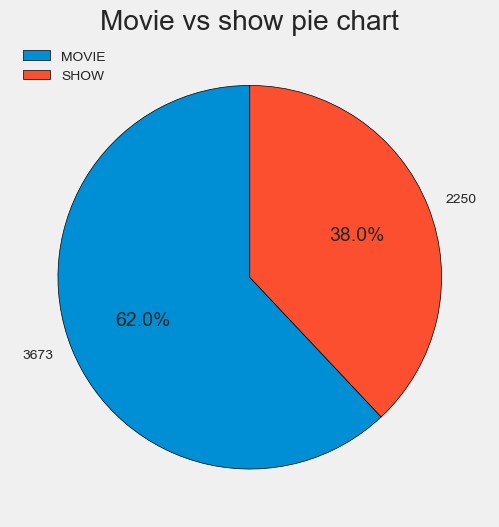

In [252]:
plt.style.use('fivethirtyeight')
plt.pie(type_count,labels=type_count,startangle=90,autopct='%1.1f%%',wedgeprops = {"edgecolor" : "black"})
plt.title('Movie vs show pie chart')
plt.tight_layout()
plt.legend(loc = 'upper left', labels=type_count.index,fontsize='10')
plt.show()

### Number of movies and shows per country

In [253]:
country_grp = netflix.groupby(['country'])
group = country_grp[['type']].value_counts()
group

country  type 
AE       MOVIE    22
         SHOW      2
AF       MOVIE     2
AL       MOVIE     2
AO       MOVIE     1
                  ..
VN       MOVIE     4
         SHOW      1
ZA       MOVIE    42
         SHOW     14
ZW       MOVIE     1
Length: 165, dtype: int64

### Top 10 countries by number of movies

In [254]:
movie = netflix['type']=='MOVIE'
movie_df=netflix.loc[movie]
country_mvi_grp= movie_df.groupby(['country'])
top_10_countries_by_movie = country_mvi_grp[['type']].count().nlargest(10,'type')
top_10_countries_by_movie

,type
country,
US,1426
IN,597
GB,253
FR,170
ES,144
CA,140
JP,119
DE,109
NG,93


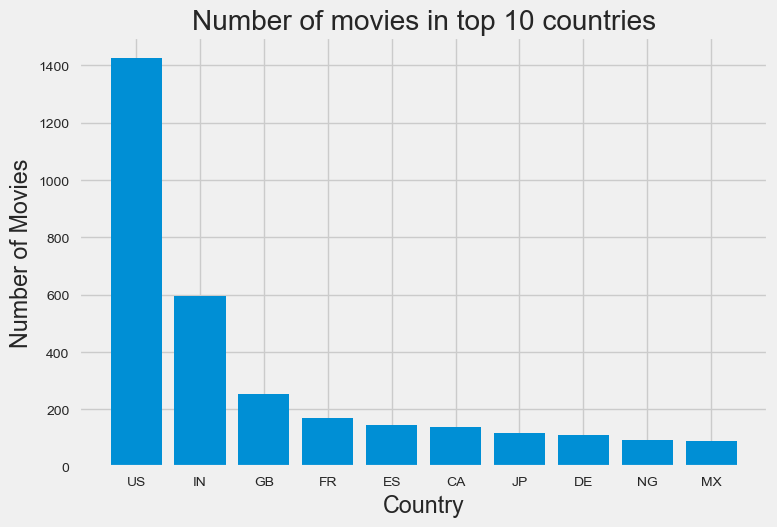

In [255]:
x = top_10_countries_by_movie.index
y = top_10_countries_by_movie['type']

plt.style.use('fivethirtyeight')
plt.bar(x,y)

plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.title('Number of movies in top 10 countries')
plt.tight_layout()
plt.show()

### Top 10 countries by number of shows

In [256]:
show = netflix['type']=='SHOW'
show_df=netflix.loc[show]
country_shw_grp= show_df.groupby(['country'])
top_10_countries_by_show = country_shw_grp[['type']].count().nlargest(10,'type')
top_10_countries_by_show 

,type
country,
US,880
KR,209
JP,184
GB,168
ES,87
FR,71
IN,58
CA,57
MX,56


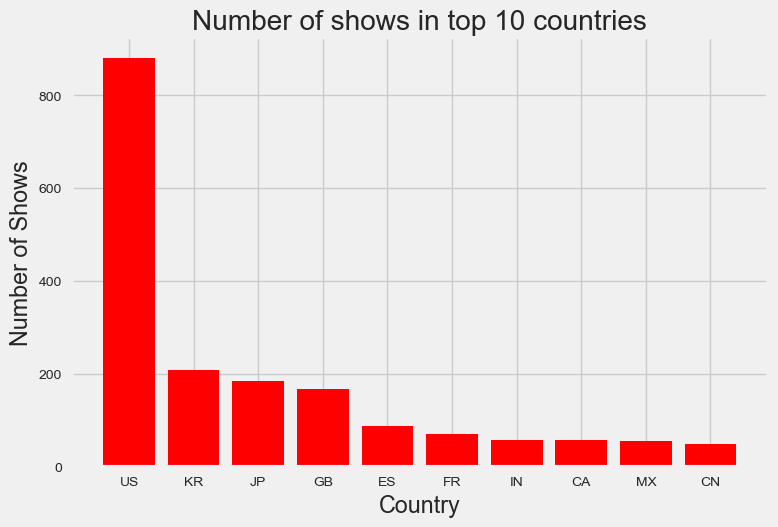

In [257]:
x = top_10_countries_by_show.index
y = top_10_countries_by_show['type']

plt.style.use('fivethirtyeight')
plt.bar(x,y,color = 'r')

plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.title('Number of shows in top 10 countries')
plt.tight_layout()
plt.show()

### Total number of movies & shows released by year

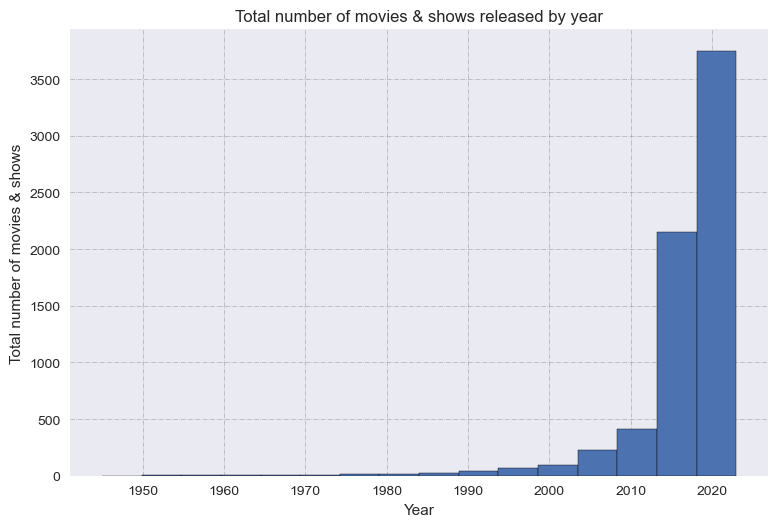

In [258]:
plt.style.use('seaborn')
plt.hist(netflix['release_year'],bins=16,edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Total number of movies & shows')
plt.title('Total number of movies & shows released by year')

plt.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)
plt.tight_layout()
plt.show()

### Top imdb rating movie and show

In [259]:
grp = netflix.groupby(['type'])
grp[['imdb_score']].max()

,imdb_score
type,
MOVIE,9.0
SHOW,9.6


In [260]:
top_imdb_rate_movie = (netflix['imdb_score']==9.0) & (netflix['type']=='MOVIE')
netflix.loc[top_imdb_rate_movie]

,id,title,type,description,release_year,age_certification,runtime,genres,country,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
242,tm56184,The Dark Knight,MOVIE,Batman raises the stakes in his war on crime. ...,2008,PG-13,152,"drama, thriller, action, crime",GB,NaN,tt0468569,9.0,2684317.0,81.703,8.508
243,tm56184,The Dark Knight,MOVIE,Batman raises the stakes in his war on crime. ...,2008,PG-13,152,"drama, thriller, action, crime",US,NaN,tt0468569,9.0,2684317.0,81.703,8.508
253,tm142381,The Lord of the Rings: The Return of the King,MOVIE,Aragorn is revealed as the heir to the ancient...,2003,PG-13,201,"fantasy, action, drama",NZ,NaN,tt0167260,9.0,1865989.0,83.617,8.474
254,tm142381,The Lord of the Rings: The Return of the King,MOVIE,Aragorn is revealed as the heir to the ancient...,2003,PG-13,201,"fantasy, action, drama",US,NaN,tt0167260,9.0,1865989.0,83.617,8.474


In [261]:
top_imdb_rate_show = (netflix['imdb_score']==9.6) & (netflix['type']=='SHOW')
netflix.loc[top_imdb_rate_show]

,id,title,type,description,release_year,age_certification,runtime,genres,country,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
2774,ts116101,Crazy Delicious,SHOW,Everyday meals are turned into extraordinary c...,2017,NaN,47,reality,GB,1.0,tt7626160,9.6,14.0,2.128,7.5


### Country with median number of indb & tmdb ratings

In [262]:
grp = netflix.groupby(['country'])
median_ratings = grp[['imdb_score','tmdb_score']].median()
median_ratings

,imdb_score,tmdb_score
country,,
AE,6.15,5.6670
AF,7.70,7.0500
AL,6.20,6.3950
AO,3.90,5.6000
AR,6.40,6.6125
...,...,...
VA,6.50,7.3000
VE,7.30,7.7280
VN,6.00,6.2000


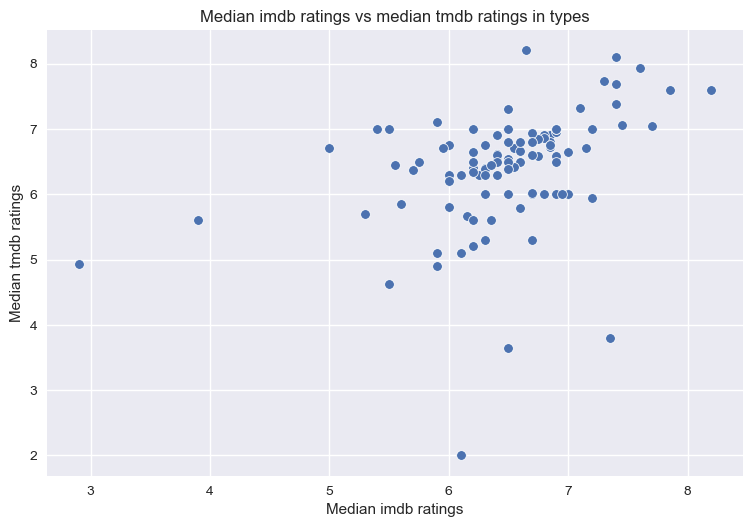

In [263]:
plt.title('Median imdb ratings vs median tmdb ratings in types')
sns.scatterplot(x = median_ratings['imdb_score'],y = median_ratings['tmdb_score'])
plt.xlabel('Median imdb ratings')
plt.ylabel('Median tmdb ratings')
plt.show()

### Genres used in number of types

In [264]:
drp_duplicate_row = netflix.drop_duplicates(subset='id', keep="first", inplace=False)

In [265]:
new_df = drp_duplicate_row[['genres']]
A = new_df['genres'].str.split(',').explode().reset_index(drop=True).str.strip()
genres_grp = A.groupby([A.values]).count()
genres_grp

action           1132
animation         680
comedy           2413
crime             945
documentation     967
drama            3094
european          381
family            685
fantasy           656
history           272
horror            361
music             256
reality           269
romance          1045
scifi             593
sport             189
thriller         1217
war               156
western            37
Name: genres, dtype: int64

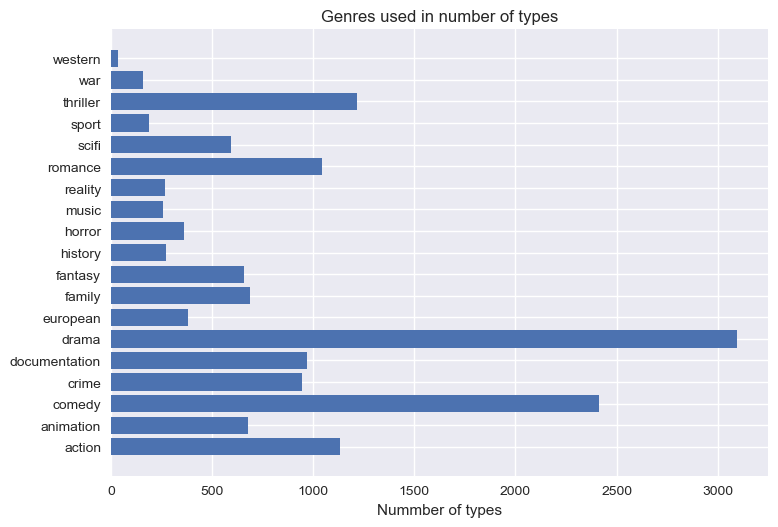

In [266]:
plt.barh(genres_grp.index,genres_grp.values)
plt.title('Genres used in number of types')
plt.xlabel('Nummber of types')
plt.tight_layout()
plt.show()

### Max runtime movie in minutes

In [267]:
movie = netflix['type']=='MOVIE'
netflix.loc[movie].sort_values(by='runtime',ascending=False).head(1)

,id,title,type,description,release_year,age_certification,runtime,genres,country,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
599,tm25842,A Lion in the House,MOVIE,Five families struggle with the ups and downs ...,2006,NaN,225,documentation,US,NaN,tt0492472,8.7,338.0,2.821,6.5


### Show with max seasons in minutes

In [268]:
show = netflix['type']=='SHOW'
netflix.loc[show].sort_values(by='seasons',ascending=False).head(1)

,id,title,type,description,release_year,age_certification,runtime,genres,country,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
91,ts20981,Survivor,SHOW,A reality show contest where sixteen or more c...,2000,NaN,48,reality,US,44.0,tt0760143,7.5,25709.0,66.565,7.426


In [269]:
credits

,person_id,id,name,character,role
0,3180,tm82169,Sylvester Stallone,"Robert ""Rocky"" Balboa",ACTOR
1,7748,tm82169,Talia Shire,"Adrianna ""Adrian"" Pennino",ACTOR
2,7749,tm82169,Burt Young,Paulie Pennino,ACTOR
3,7750,tm82169,Carl Weathers,Apollo Creed,ACTOR
4,7751,tm82169,Burgess Meredith,Mickey Goldmill,ACTOR
...,...,...,...,...,...
81350,449518,tm1072700,Kayode Olaiya,Uncle Adio,ACTOR
81351,2722717,tm1072700,Tolu Osaile,Sade,ACTOR
81352,2722797,tm1072700,Eniola Oyetola,Officer Meks,ACTOR
81353,866314,tm1072700,Tope Tedela,Officer Jack,ACTOR


### Actor of top 10 max number of movies/shows in netflix

In [270]:
actor = credits.query("role == 'ACTOR'")

actor.groupby(['name'])[['role']].count().sort_values(by='role', ascending=False).head(10)

,role
name,
Shah Rukh Khan,38
Boman Irani,24
Anupam Kher,23
Fred Tatasciore,21
Kareena Kapoor Khan,21
Aamir Khan,20
Kari Wahlgren,20
Naseeruddin Shah,19
Yuki Kaji,19


### Director of top 10 max number of movies/shows in netflix

In [271]:
director = credits.query("role == 'DIRECTOR'")

director.groupby(['name'])[['role']].count().sort_values(by='role', ascending=False).head(10)

,role
name,
Raúl Campos,20
Jan Suter,19
Ryan Polito,17
Jay Karas,15
Marcus Raboy,15
Cathy Garcia-Molina,12
Youssef Chahine,12
Suhas Kadav,11
Jay Chapman,10


### Top imdb rating holder movie/show maker

In [272]:
# using merging method to join netflix and credits table

merged_df = pd.merge(netflix, credits, how='inner', on = 'id')
merged_df[['id','person_id','name','role','title','type','imdb_id','imdb_score','imdb_votes','tmdb_popularity','tmdb_score']]

,id,person_id,name,role,title,type,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm82169,3180,Sylvester Stallone,ACTOR,Rocky,MOVIE,tt0075148,8.1,588100.0,106.361,7.782
1,tm82169,7748,Talia Shire,ACTOR,Rocky,MOVIE,tt0075148,8.1,588100.0,106.361,7.782
2,tm82169,7749,Burt Young,ACTOR,Rocky,MOVIE,tt0075148,8.1,588100.0,106.361,7.782
3,tm82169,7750,Carl Weathers,ACTOR,Rocky,MOVIE,tt0075148,8.1,588100.0,106.361,7.782
4,tm82169,7751,Burgess Meredith,ACTOR,Rocky,MOVIE,tt0075148,8.1,588100.0,106.361,7.782
...,...,...,...,...,...,...,...,...,...,...,...
98988,tm1072700,449518,Kayode Olaiya,ACTOR,All Na Vibes,MOVIE,tt14922926,5.2,18.0,1.357,4.000
98989,tm1072700,2722717,Tolu Osaile,ACTOR,All Na Vibes,MOVIE,tt14922926,5.2,18.0,1.357,4.000
98990,tm1072700,2722797,Eniola Oyetola,ACTOR,All Na Vibes,MOVIE,tt14922926,5.2,18.0,1.357,4.000
98991,tm1072700,866314,Tope Tedela,ACTOR,All Na Vibes,MOVIE,tt14922926,5.2,18.0,1.357,4.000


In [273]:
# Director of top imdb rated movie

top_imdb_rate_movie = (merged_df['imdb_score']==9.0) & (merged_df['type']=='MOVIE') & (merged_df['role']=='DIRECTOR')
merged_df.loc[top_imdb_rate_movie]

,id,title,type,description,release_year,age_certification,runtime,genres,country,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
5228,tm56184,The Dark Knight,MOVIE,Batman raises the stakes in his war on crime. ...,2008,PG-13,152,"drama, thriller, action, crime",GB,NaN,tt0468569,9.0,2684317.0,81.703,8.508,1725,Christopher Nolan,NaN,DIRECTOR
5363,tm56184,The Dark Knight,MOVIE,Batman raises the stakes in his war on crime. ...,2008,PG-13,152,"drama, thriller, action, crime",US,NaN,tt0468569,9.0,2684317.0,81.703,8.508,1725,Christopher Nolan,NaN,DIRECTOR
5855,tm142381,The Lord of the Rings: The Return of the King,MOVIE,Aragorn is revealed as the heir to the ancient...,2003,PG-13,201,"fantasy, action, drama",NZ,NaN,tt0167260,9.0,1865989.0,83.617,8.474,1283,Peter Jackson,NaN,DIRECTOR
5934,tm142381,The Lord of the Rings: The Return of the King,MOVIE,Aragorn is revealed as the heir to the ancient...,2003,PG-13,201,"fantasy, action, drama",US,NaN,tt0167260,9.0,1865989.0,83.617,8.474,1283,Peter Jackson,NaN,DIRECTOR


In [274]:
# top imdb rated show has no director

top_imdb_rate_show = (merged_df['imdb_score']==9.6) & (merged_df['type']=='SHOW') & (merged_df['role']=='DIRECTOR')
merged_df.loc[top_imdb_rate_show]

,id,title,type,description,release_year,age_certification,runtime,genres,country,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role


### Name of the persons in netflix who are actor and director both 

In [276]:
k=credits.groupby(['person_id','name']).agg({'role': list}).reset_index()

In [277]:
k['role'] = k['role'].apply(lambda x: ','.join(x))

In [278]:
k[k['role'].str.contains('|'.join(['ACTOR,DIRECTOR','DIRECTOR,ACTOR']))]

,person_id,name,role
81,223,Nora Ephron,"DIRECTOR,DIRECTOR,ACTOR"
106,308,Bo Burnham,"ACTOR,ACTOR,DIRECTOR,ACTOR,DIRECTOR,DIRECTOR,A..."
268,937,Andy Nyman,"DIRECTOR,ACTOR,ACTOR"
374,1283,Peter Jackson,"ACTOR,DIRECTOR,ACTOR,DIRECTOR,ACTOR,DIRECTOR,A..."
384,1324,Ron Howard,"DIRECTOR,ACTOR,DIRECTOR,DIRECTOR"
...,...,...,...
49720,1936306,Myriam Fares,"ACTOR,DIRECTOR"
49837,1950442,Yedinson Flórez,"ACTOR,DIRECTOR,ACTOR"
52453,2219991,Steven Rinella,"ACTOR,ACTOR,DIRECTOR"
54590,2472309,Udoka Oyeka,"ACTOR,DIRECTOR"
